In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Chirp
from thinkdsp import normalize, unbias
from thinkdsp import decorate

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [4]:
class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [24]:
s = SawtoothChirp(start=220, end=880)
wave = s.make_wave(duration=1, framerate=25000)
wave.apodize()
wave.make_audio()

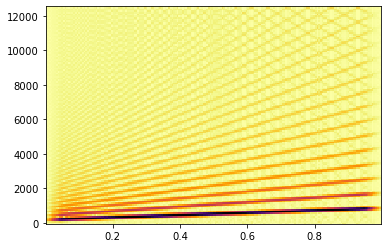

In [25]:
spec_gram = wave.make_spectrogram(256)
spec_gram.plot()

In [26]:
s = SawtoothChirp(start=2500, end=3000)
wave = s.make_wave(duration=1, framerate=20000)
wave.make_audio()

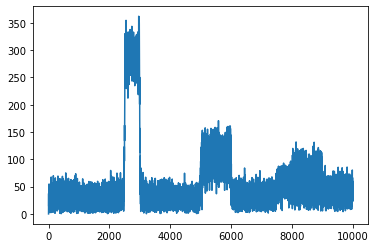

In [27]:
wave.make_spectrum().plot()

In [34]:
from thinkdsp import read_wave
wave = read_wave('1.wav')
wave.make_audio()

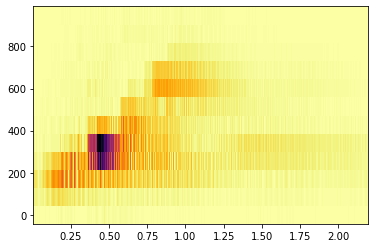

In [35]:
wave.make_spectrogram(512).plot(high=1000)

In [36]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        len1, len2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(len1, len2, len(ts))
        freqs = 1 / lengths
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [50]:
s = TromboneGliss(349, 262)
wave = s.make_wave(duration=1)
wave.apodize()
wave.make_audio()

In [51]:
s = TromboneGliss(262, 349)
wave1 = s.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [52]:
wave2 = wave | wave1
wave.make_audio()

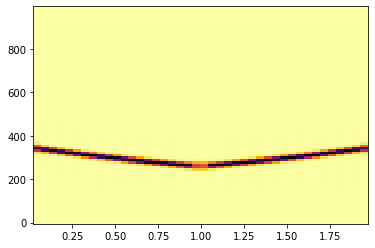

In [67]:
spec_gram = wave2.make_spectrogram(1024)
spec_gram.plot(high=1000)

In [68]:
wave = read_wave('gl.wav')
wave.make_audio()

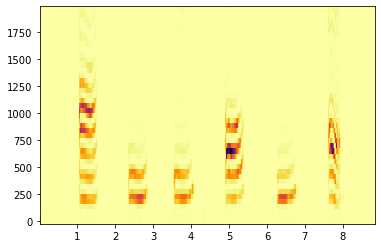

In [70]:
wave.make_spectrogram(1024).plot(high=2000)

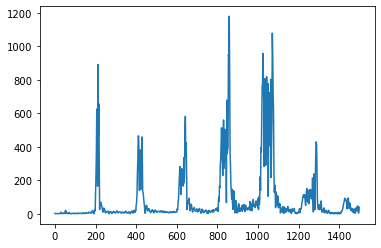

In [90]:
segment = wave.segment(start=1, duration=0.5)
segment.make_spectrum().plot(high=1500)

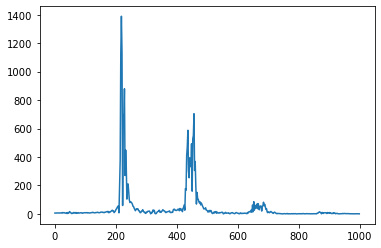

In [91]:
segment = wave.segment(start=2.3, duration=0.5)
segment.make_spectrum().plot(high=1000)

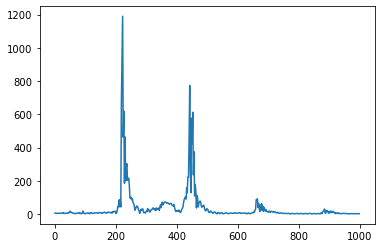

In [92]:
segment = wave.segment(start=3.5, duration=0.5)
segment.make_spectrum().plot(high=1000)

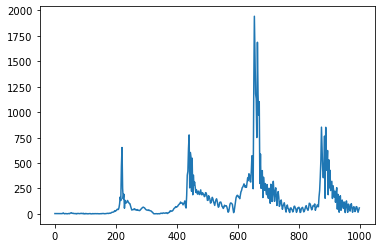

In [93]:
segment = wave.segment(start=4.9, duration=0.5)
segment.make_spectrum().plot(high=1000)

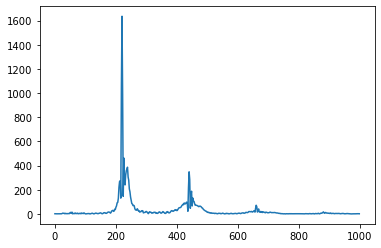

In [94]:
segment = wave.segment(start=6.2, duration=0.5)
segment.make_spectrum().plot(high=1000)

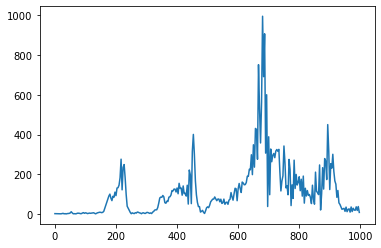

In [95]:
segment = wave.segment(start=7.6, duration=0.3)
segment.make_spectrum().plot(high=1000)